In [334]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-data-for-analytics/HR_comma_sep.csv


In [335]:
import numpy as np
import pandas as pd

In [336]:
df = pd.read_csv('../input/hr-data-for-analytics/HR_comma_sep.csv')

In [337]:
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [338]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [339]:
#to check any null values
df.isna()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
14994,False,False,False,False,False,False,False,False,False,False
14995,False,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False,False


In [340]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

We do not find any null values in the dataset

In [341]:
#now let us check the data types and shape of the dataset
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [342]:
df.shape

(14999, 10)

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [344]:
#lets check the column names
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [345]:
df.sales.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [346]:
#Now let us change the feature name sales to dept
df = df.rename(columns={'sales':'dept'})
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


Great! The sales column name is change successfully..

In [347]:
#check the unique values of dept column
df.dept.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [348]:
#the same way, let us check the unique values of salary
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [349]:
#now let us check how many employees left the company
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

We can observe that there are total 3571 employees left the company. 
Now, let us plot and visualize it.

Univariant

In [350]:
import seaborn as sns
import matplotlib.pyplot as plt


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='left', ylabel='count'>

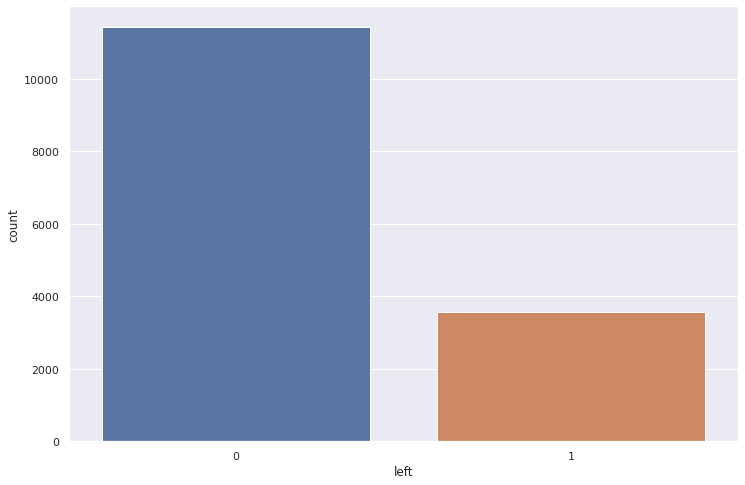

In [351]:
df['left'].value_counts()
sns.countplot(df.left)

Now let us visualize the employees with different salary ranges(i.e. low, high, and medium)

In [352]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

We can observe that there are only 1237 employees with high salary. Least number of employees with high salary and maximum number of employees with low and medium salaries.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='salary', ylabel='count'>

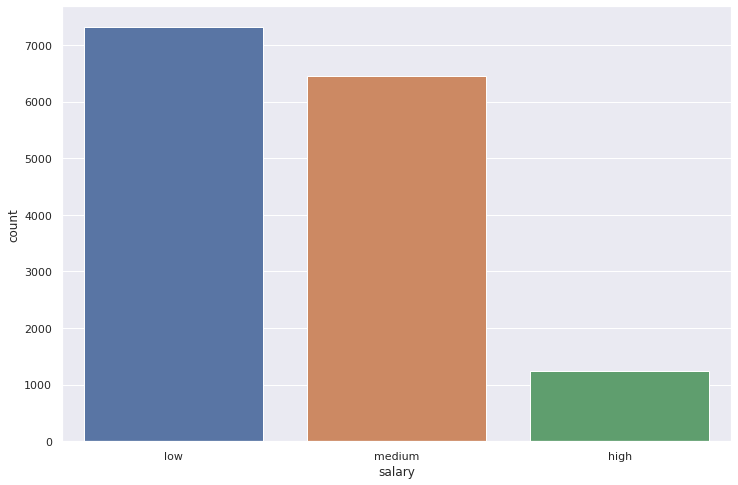

In [353]:
#lets plot the salary of employees
df.salary.value_counts()
sns.countplot(df.salary)

In [354]:
#let us check how many of employees got promotion in the last 5 years
df.promotion_last_5years.value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

We can observe that there are 319 employees who got promotion in the last 5 years. Let's plot it to visualize.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='promotion_last_5years', ylabel='count'>

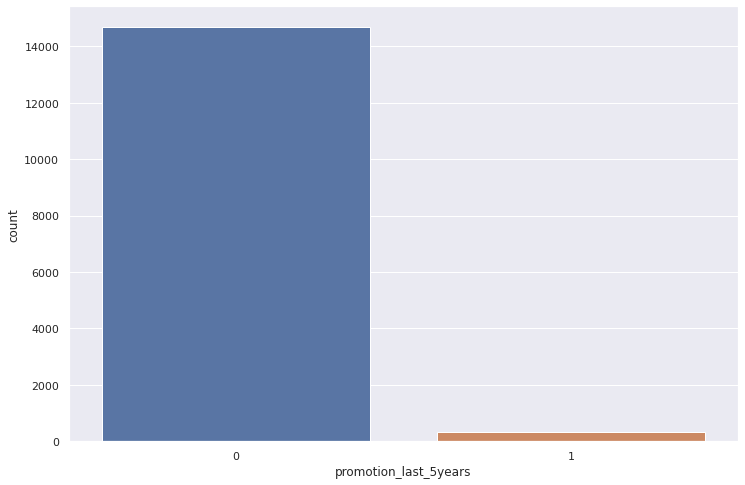

In [355]:
#lets plot the employees who got promoted in the last 5 years
sns.countplot(df.promotion_last_5years)

In [356]:
#lets check the employees in department
df.dept.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: dept, dtype: int64

Here, we can observe that there are maximum number of employees in the sales department and least number of employees in the management department. Let us plot it.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 0, 'Department'), Text(0, 0.5, 'Count of department')]

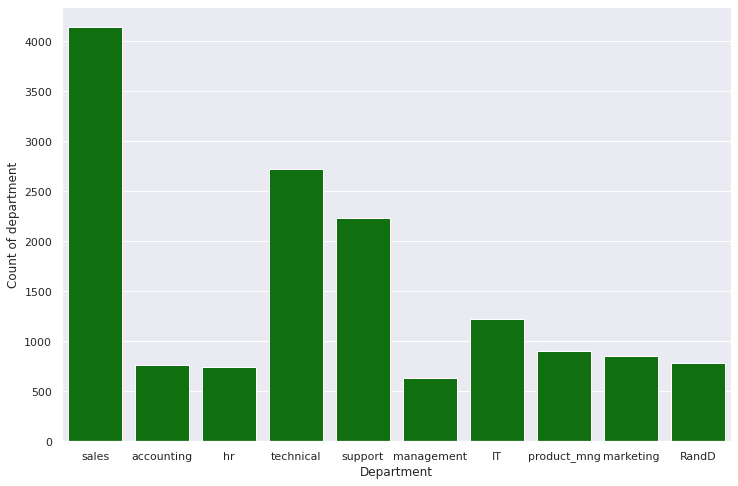

In [357]:
#lets plot the departments of the company
sns.set(rc={"figure.figsize":(12, 8)})
ax = sns.countplot(df.dept, x = 'dept',color = 'green',hue = None)
ax.set(xlabel="Department", ylabel="Count of department")


In [358]:
#lets check the satisfaction levels of the employees
df.satisfaction_level.value_counts()

0.10    358
0.11    335
0.74    257
0.77    252
0.84    247
       ... 
0.25     34
0.28     31
0.27     30
0.26     30
0.12     30
Name: satisfaction_level, Length: 92, dtype: int64

In [359]:
#lets multiply the satisfaction levels with 10, in order to get the exact percentage
df.satisfaction_level = df.satisfaction_level*10

In [360]:
#now lets check the values
df.satisfaction_level.value_counts()

1.0    358
1.1    335
7.4    257
7.7    252
8.4    247
      ... 
2.5     34
2.8     31
2.7     30
2.6     30
1.2     30
Name: satisfaction_level, Length: 92, dtype: int64

In [361]:
#lets do the same with the last evaluation
df.last_evaluation.value_counts()

0.55    358
0.50    353
0.54    350
0.51    345
0.57    333
       ... 
0.39     52
0.43     50
0.38     50
0.44     44
0.36     22
Name: last_evaluation, Length: 65, dtype: int64

In [362]:
df.last_evaluation = df.last_evaluation*10

In [363]:
df.last_evaluation.value_counts()

5.5    358
5.0    353
5.4    350
5.1    345
5.7    333
      ... 
3.9     52
4.3     50
3.8     50
4.4     44
3.6     22
Name: last_evaluation, Length: 65, dtype: int64

[Text(0.5, 0, 'Department'), Text(0, 0.5, 'Satisfaction levels of Employees')]

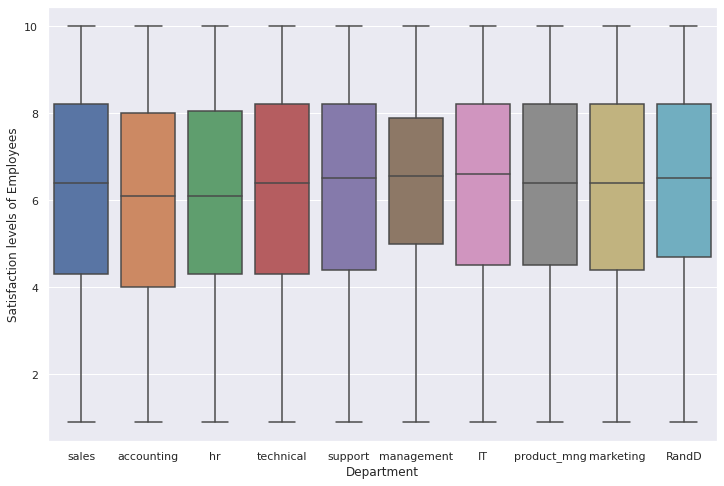

In [364]:
#now lets plot the department of employees who are satisfied 
sns.set(rc={"figure.figsize":(12, 8)})
ax=sns.boxplot(x=df['dept'], y=df['satisfaction_level'])
ax.set(xlabel="Department", ylabel="Satisfaction levels of Employees")

In [365]:
#lets calculate the average satisfaction level
avg_satisfaction_level = np.mean(df.satisfaction_level)
avg_satisfaction_level

6.128335222348156

In [366]:
#lets add the avgerage satisfaction level column to the dataframe
df['avg_satisfaction_level'] = avg_satisfaction_level
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary,avg_satisfaction_level
0,3.8,5.3,2,157,3,0,1,0,sales,low,6.128335
1,8.0,8.6,5,262,6,0,1,0,sales,medium,6.128335
2,1.1,8.8,7,272,4,0,1,0,sales,medium,6.128335
3,7.2,8.7,5,223,5,0,1,0,sales,low,6.128335
4,3.7,5.2,2,159,3,0,1,0,sales,low,6.128335
...,...,...,...,...,...,...,...,...,...,...,...
14994,4.0,5.7,2,151,3,0,1,0,support,low,6.128335
14995,3.7,4.8,2,160,3,0,1,0,support,low,6.128335
14996,3.7,5.3,2,143,3,0,1,0,support,low,6.128335
14997,1.1,9.6,6,280,4,0,1,0,support,low,6.128335


In [367]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary,avg_satisfaction_level
0,3.8,5.3,2,157,3,0,1,0,sales,low,6.128335
1,8.0,8.6,5,262,6,0,1,0,sales,medium,6.128335
2,1.1,8.8,7,272,4,0,1,0,sales,medium,6.128335
3,7.2,8.7,5,223,5,0,1,0,sales,low,6.128335
4,3.7,5.2,2,159,3,0,1,0,sales,low,6.128335


In [368]:
#create a dummie variable for the left emps
df_dummies = pd.get_dummies(df['left'])
df_dummies

,0,1
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
14994,0,1
14995,0,1
14996,0,1
14997,0,1


In [369]:
df1 = pd.concat([df,df_dummies],axis=1)
df1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary,avg_satisfaction_level,0,1
0,3.8,5.3,2,157,3,0,1,0,sales,low,6.128335,0,1
1,8.0,8.6,5,262,6,0,1,0,sales,medium,6.128335,0,1
2,1.1,8.8,7,272,4,0,1,0,sales,medium,6.128335,0,1
3,7.2,8.7,5,223,5,0,1,0,sales,low,6.128335,0,1
4,3.7,5.2,2,159,3,0,1,0,sales,low,6.128335,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,4.0,5.7,2,151,3,0,1,0,support,low,6.128335,0,1
14995,3.7,4.8,2,160,3,0,1,0,support,low,6.128335,0,1
14996,3.7,5.3,2,143,3,0,1,0,support,low,6.128335,0,1
14997,1.1,9.6,6,280,4,0,1,0,support,low,6.128335,0,1


[Text(0.5, 0, 'Montly hours worked'), Text(0, 0.5, 'Total')]

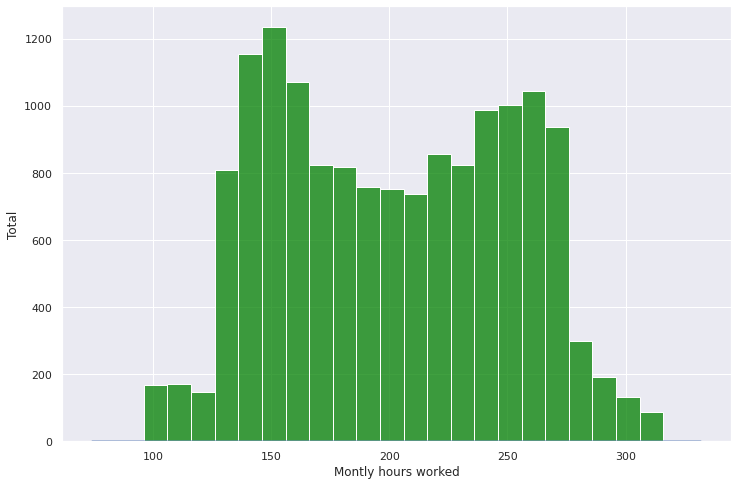

In [370]:
#lets plot the average monthly hours of employees
ax = sns.histplot(data=df, x='average_montly_hours', binwidth=10, color='green')
sns.kdeplot(df['average_montly_hours'])
ax.set(xlabel="Montly hours worked", ylabel="Total")

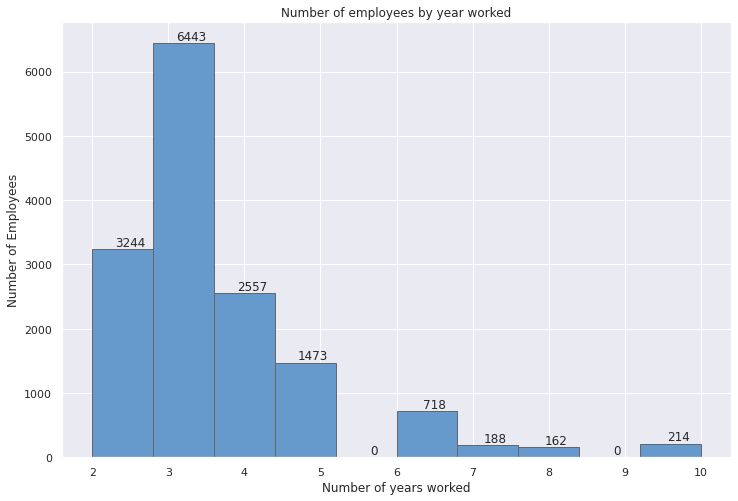

In [371]:
#lets plot the how many years employees worked 


hist, bins = np.histogram(df['time_spend_company'], bins=10)

plt.hist(df['time_spend_company'], bins=bins, color='#6699CC', edgecolor='#666666')
for i, count in enumerate(hist):
    plt.text(bins[i] + 0.5, count, str(count), ha='center', va='bottom')

plt.title("Number of employees by year worked")
plt.xlabel("Number of years worked")
plt.ylabel("Number of Employees")
plt.show()


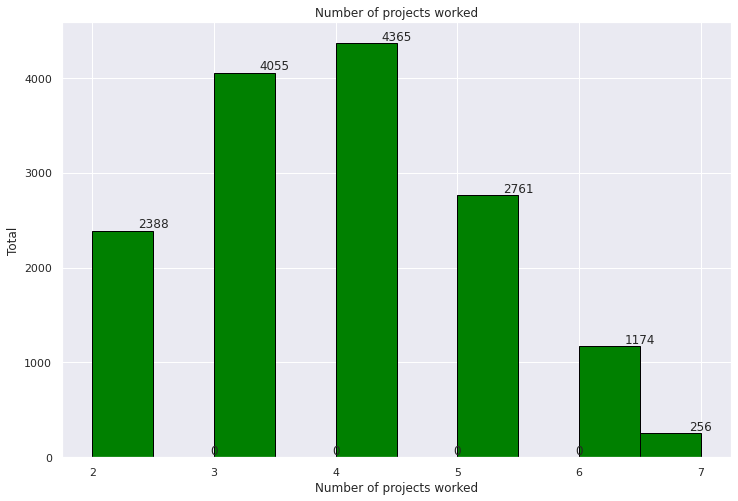

In [372]:
hist, bins = np.histogram(df['number_project'], bins=10)

plt.hist(df['number_project'], bins=bins, color='green', edgecolor='black')

for i, count in enumerate(hist):
    plt.text(bins[i] + 0.5, count, str(count), ha='center', va='bottom')

plt.title("Number of projects worked")
plt.xlabel("Number of projects worked")
plt.ylabel("Total")
plt.show()

We can observe that the maximum number of employees worked on 4 projects and the least number of employees worked on 7 projects. We can also, observe that no employee worked on single project.

[Text(0.5, 0, 'Department'), Text(0, 0.5, 'Time Spend Company')]

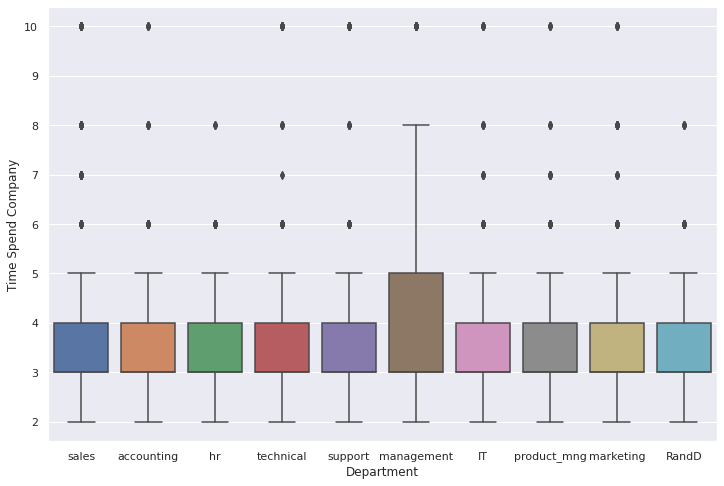

In [373]:
sns.set(rc={"figure.figsize":(12, 8)})
ax=sns.boxplot(x=df['dept'], y=df['time_spend_company'])
ax.set(xlabel="Department", ylabel="Time Spend Company")


We can observe that the employees of the Management department stays longer in the cmompany

In [374]:
#lets remove the avg satisfaction level column
df = df.drop("avg_satisfaction_level", axis=1)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,3.8,5.3,2,157,3,0,1,0,sales,low
1,8.0,8.6,5,262,6,0,1,0,sales,medium
2,1.1,8.8,7,272,4,0,1,0,sales,medium
3,7.2,8.7,5,223,5,0,1,0,sales,low
4,3.7,5.2,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,4.0,5.7,2,151,3,0,1,0,support,low
14995,3.7,4.8,2,160,3,0,1,0,support,low
14996,3.7,5.3,2,143,3,0,1,0,support,low
14997,1.1,9.6,6,280,4,0,1,0,support,low


In [375]:
df = pd.get_dummies(df,drop_first=True)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_low,salary_medium
0,3.8,5.3,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,8.0,8.6,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,1.1,8.8,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,7.2,8.7,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,3.7,5.2,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,4.0,5.7,2,151,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14995,3.7,4.8,2,160,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14996,3.7,5.3,2,143,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14997,1.1,9.6,6,280,4,0,1,0,0,0,0,0,0,0,0,1,0,1,0


In [376]:
!pip install klib

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

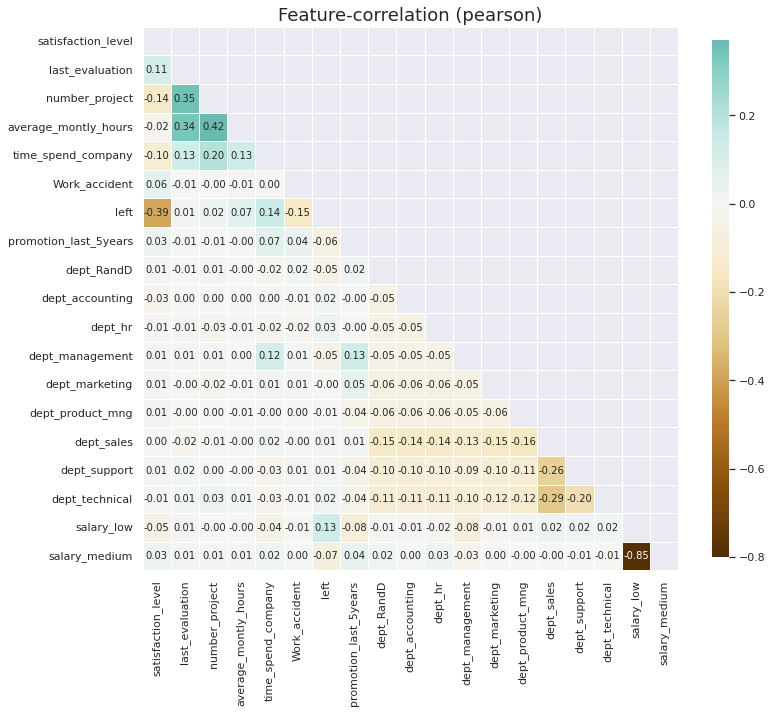

In [377]:
import klib
klib.corr_plot(df)

In [378]:
df.corr(method='spearman')['satisfaction_level']

satisfaction_level       1.000000
last_evaluation          0.162407
number_project           0.005786
average_montly_hours     0.062000
time_spend_company      -0.139428
Work_accident            0.056333
left                    -0.365842
promotion_last_5years    0.022306
dept_RandD               0.007332
dept_accounting         -0.027974
dept_hr                 -0.014826
dept_management          0.003362
dept_marketing           0.003910
dept_product_mng         0.004895
dept_sales               0.005348
dept_support             0.008431
dept_technical          -0.006489
salary_low              -0.043552
salary_medium            0.030095
Name: satisfaction_level, dtype: float64

**Train and Test Spliting the Data**

In [379]:
x=df.loc[:,df.columns!='left']
y=df.loc[:,df.columns=='left']
x

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_low,salary_medium
0,3.8,5.3,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0
1,8.0,8.6,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,1
2,1.1,8.8,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1
3,7.2,8.7,5,223,5,0,0,0,0,0,0,0,0,1,0,0,1,0
4,3.7,5.2,2,159,3,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,4.0,5.7,2,151,3,0,0,0,0,0,0,0,0,0,1,0,1,0
14995,3.7,4.8,2,160,3,0,0,0,0,0,0,0,0,0,1,0,1,0
14996,3.7,5.3,2,143,3,0,0,0,0,0,0,0,0,0,1,0,1,0
14997,1.1,9.6,6,280,4,0,0,0,0,0,0,0,0,0,1,0,1,0


In [380]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.3,random_state=7)#here we assigned 70% data to train set and 30% to test set
print(xtrain.shape)
print(xtest.shape)

(10499, 18)
(4500, 18)


Standard Scaling

In [381]:
from sklearn.preprocessing import StandardScaler

In [382]:

scaler=StandardScaler()
xtrain=pd.DataFrame(scaler.fit_transform(xtrain,ytrain ),index=xtrain.index,columns=xtrain.columns)

xtrain.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_low,salary_medium
4853,0.270202,0.780291,-0.652998,0.837085,0.342473,-0.405090,-0.146636,-0.236471,-0.232857,-0.22549,-0.21186,-0.249012,-0.252658,-0.610702,-0.422302,2.120580,-0.983094,1.165447
11008,1.233495,1.600021,-0.652998,-0.498256,3.078346,-0.405090,-0.146636,-0.236471,-0.232857,-0.22549,-0.21186,-0.249012,-0.252658,1.637460,-0.422302,-0.471569,-0.983094,1.165447
10954,-1.816931,1.307260,0.155472,1.195833,1.710409,-0.405090,-0.146636,-0.236471,-0.232857,-0.22549,-0.21186,-0.249012,-0.252658,-0.610702,-0.422302,2.120580,1.017197,-0.858040
13362,-0.291718,1.365812,0.155472,1.096181,-0.341496,-0.405090,-0.146636,-0.236471,-0.232857,-0.22549,-0.21186,-0.249012,-0.252658,-0.610702,2.367974,-0.471569,1.017197,-0.858040
5019,1.072946,0.019112,-1.461469,-1.136031,0.342473,2.468586,-0.146636,-0.236471,-0.232857,-0.22549,-0.21186,-0.249012,-0.252658,-0.610702,-0.422302,2.120580,1.017197,-0.858040


In [383]:
xtest=pd.DataFrame(scaler.fit_transform(xtest,ytest ),index=xtest.index,columns=xtest.columns)

xtest.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_low,salary_medium
404,0.593414,0.903215,0.988145,0.887399,1.033488,-0.425197,-0.149207,-0.232618,-0.230487,-0.232618,-0.203533,-0.239957,-0.253640,1.579173,-0.407189,-0.468521,1.042688,-0.892015
5221,0.552993,-1.363865,-1.466308,1.676980,1.720545,-0.425197,-0.149207,-0.232618,-0.230487,4.298897,-0.203533,-0.239957,-0.253640,-0.633243,-0.407189,-0.468521,1.042688,-0.892015
3357,0.391310,-0.143130,0.169994,-0.428569,-0.340628,2.351851,-0.149207,4.298897,-0.230487,-0.232618,-0.203533,-0.239957,-0.253640,-0.633243,-0.407189,-0.468521,-0.959060,1.121058
7336,-0.376686,0.205652,0.169994,1.312558,-0.340628,-0.425197,-0.149207,-0.232618,-0.230487,-0.232618,-0.203533,4.167415,-0.253640,-0.633243,-0.407189,-0.468521,-0.959060,1.121058
8313,-1.589312,0.263782,0.169994,-0.509552,1.720545,2.351851,-0.149207,-0.232618,-0.230487,-0.232618,-0.203533,-0.239957,3.942603,-0.633243,-0.407189,-0.468521,-0.959060,-0.892015


**Evaluation Metrics**

In [384]:
# definig a function for Evaluation metrics 
def metrics(actual,prediction,model=''):

  print(f"{model} MSE   :", mean_squared_error(actual,prediction))
  print(f"{model} MAE   :", mean_absolute_error(actual,prediction))
  print(f"{model} RMSE  :", np.sqrt(mean_squared_error(actual,prediction)))

**Baseline Model**

In [385]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#building the baseline model
test=pd.DataFrame()
test['ytest']=pd.DataFrame(ytest.values)
test['ymean']=test.ytest.mean()

metrics((test['ytest']),(test['ymean']),'Base')

Base MSE   : 0.17900735802469137
Base MAE   : 0.3580147160493828
Base RMSE  : 0.42309261164039647


In [386]:
#lets check for train dataset
train=pd.DataFrame()
train['ytrain']=pd.DataFrame(ytrain.values)
train['ymean']=train.ytrain.mean()

metrics((train['ytrain']),(train['ymean']),'Base')

Base MSE   : 0.18241188632381783
Base MAE   : 0.3648237726476356
Base RMSE  : 0.42709704555735084


In [387]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import precision_score,accuracy_score,confusion_matrix,f1_score,recall_score
from sklearn.metrics import classification_report

In [388]:
#linear Regression
lr=LinearRegression()
lr.fit(xtrain,ytrain)

ypredict=lr.predict(xtest)

#Evaluation metrics of linear regression

metrics((ytest),(ypredict),'LR_test')

LR_test MSE   : 0.1439322934560434
LR_test MAE   : 0.3035341863216422
LR_test RMSE  : 0.3793840975265613


In [389]:
#Random Forest 
rf=RandomForestClassifier(n_estimators=100)
rf.fit(xtrain,ytrain)

ypredict=rf.predict(xtest)
rf_acc=accuracy_score(ytest,ypredict)
rf_acc

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.9882222222222222

In [390]:
#Linear SVM
lr_svm=SVC(C= 10, kernel= 'linear',random_state=22,class_weight={0:0.3 , 1:0.7})
lr_svm.fit(xtrain,ytrain)
lr_svm_pred=lr_svm.predict(xtest)
lr_svm_cm=confusion_matrix(ytest,lr_svm_pred)
acc_svm=accuracy_score(lr_svm_pred,ytest)

print(acc_svm)
print("***************************************")
print(classification_report(lr_svm_pred,ytest))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7637777777777778
***************************************
              precision    recall  f1-score   support

           0       0.78      0.90      0.83      2962
           1       0.73      0.50      0.59      1538

    accuracy                           0.76      4500
   macro avg       0.75      0.70      0.71      4500
weighted avg       0.76      0.76      0.75      4500



In [391]:
#Decision Tree

dt=DecisionTreeClassifier(criterion= 'entropy', max_depth= 5,
                          min_samples_leaf= 2, min_samples_split= 3, splitter= 'random',min_weight_fraction_leaf=0.0,
                          random_state= 20,class_weight={0:0.3 , 1:0.7})
dt.fit(xtrain,ytrain)

pred_dt=dt.predict(xtest)

acc_dt=accuracy_score(pred_dt,ytest)
print(acc_dt)
print("---------------------------------------")
print(classification_report(pred_dt,ytest))

0.9273333333333333
---------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      3344
           1       0.89      0.81      0.85      1156

    accuracy                           0.93      4500
   macro avg       0.92      0.89      0.90      4500
weighted avg       0.93      0.93      0.93      4500



In [392]:
#Gaussian Navies Bayes
gnb=GaussianNB()
gnb.fit(xtrain,ytrain)
gnb_pred=gnb.predict(xtest)

print(confusion_matrix(ytest,gnb_pred))

gnb_acc=accuracy_score(ytest,gnb_pred)
gnb_acc

[[2482  967]
 [ 241  810]]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7315555555555555

**Feature Importance**

In [393]:
Important_features = ['satisfaction_level','last_evaluation','number_project',
                      'average_montly_hours','time_spend_company']

In [394]:
Important_features=df.iloc[:,:5]
Important_features.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,3.8,5.3,2,157,3
1,8.0,8.6,5,262,6
2,1.1,8.8,7,272,4
3,7.2,8.7,5,223,5
4,3.7,5.2,2,159,3


**Feature Importance of all models**

In [395]:
#Random Forest with Important_features 

rf=RandomForestClassifier(n_estimators=100)
scores2 = cross_val_score(rf, Important_features , y , cv = 10, scoring = 'accuracy' ) 

rf_acc_imp_feature=scores2.mean()
rf_acc_imp_feature

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

0.9929333333333332

In [396]:
#Decision Tree with Important_features 

dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 4
                            ,min_samples_split = 5,min_samples_leaf = 3,class_weight = {0:0.3 , 1:0.7})

scr1 = cross_val_score(dt, Important_features , y , cv = 10, scoring = 'f1' ) 
scr2 = cross_val_score(dt, Important_features , y , cv = 10, scoring = 'accuracy' ) 

print(scr1.mean())  
acc_dt_imp_feature=scr2.mean()
print(acc_dt_imp_feature) 


scr1

0.924494282916671
0.9639301311985768


array([0.94002789, 0.93103448, 0.91853933, 0.93184979, 0.92264416,
       0.925     , 0.94050992, 0.92286115, 0.91083676, 0.90163934])

In [397]:
#Gaussian Naive Bayes with Important_features

gnb = GaussianNB()
scores = cross_val_score(gnb, Important_features , y , cv =10 , scoring = 'accuracy')
 
acc_gnb_imp_feature=scores.mean()

acc_gnb_imp_feature

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

0.8030522570602624

In [398]:
models=["RandomForestClassifier","DTree","Gaussian Naive Bays"]
Accuracy_Train_Test=[rf_acc,acc_dt,gnb_acc]

Accuracy_with_important_features=[rf_acc_imp_feature,acc_dt_imp_feature,
                                                  acc_gnb_imp_feature]  

In [399]:
score= pd.DataFrame({"Classification Model" :models,
                    "Accuracy with important features":Accuracy_with_important_features})
score.sort_values(by= "Accuracy with important features",ascending=False).reset_index(drop=True)   

,Classification Model,Accuracy with important features
0,RandomForestClassifier,0.992933
1,DTree,0.963930
2,Gaussian Naive Bays,0.803052
